# Analysis of $MK^*(M)$ with respect to $M$ under $M^2 < c\lambda$
#### Unified Model with Multiple Strategic Agents 

#### Strategic Agent-Specific Message Weights 

James Yu, 11 January 2023

In [1]:
from collections import namedtuple #,defaultdict
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv as npinv
from numpy.linalg import matrix_power as nppow

In [2]:
def infinite_solution(A, delta, c, M = 1):
    # this is projected data
    n = A.shape[0]
    eps = np.finfo(np.float64).eps
    I = np.identity(n)
    eigvals, U = np.linalg.eig(A)
    D = np.diag(eigvals)
    K_t = I
    K_sequence = [K_t]
    
    while True: # generate solution matrices
        K_t_new = I + c * delta * (delta * K_t + c * I) @ nppow(npinv(M * delta * K_t + c * I), 2) @ K_t @ nppow(D, 2)
        K_sequence.insert(0, K_t_new)
        if np.allclose(K_t, K_t_new, rtol = eps, atol = eps): break
        K_t = K_t_new
        
    K_ss = K_sequence[0]
    return K_ss, M * K_ss

In [3]:
# taken from higher_cost_version.ipynb
A = np.array([ # balanced
    [0.48, 0.3, 0.22],
    [0.3, 0.52, 0.18],
    [0.22, 0.18, 0.6]
])

# Existing case: 

We expect $K^*$ to decrease in and $MK^*$ to increase in $M$ under the sufficient condition of $M^2 \geq c\lambda^2$.

Let $c = 1$, then any positive integer $M$ will satisfy this.

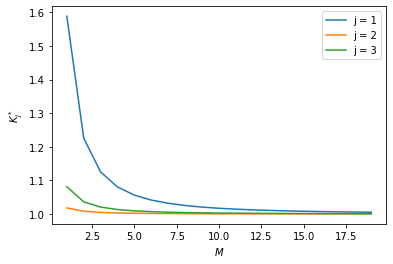

In [4]:
results = []
M_max = 20
for M in range(1, M_max):
    results.append(infinite_solution(A, 0.9, 1.0, M = M))
    
for i in range(3):
    plt.plot(range(1, M_max), [r[0][i][i] for r in results], label = f"j = {i+1}")
plt.legend()
plt.xlabel("$M$")
plt.ylabel("$K^*_j$")
plt.show()

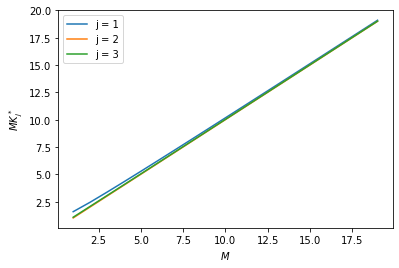

In [5]:
for i in range(3):
    plt.plot(range(1, M_max), [r[1][i][i] for r in results], label = f"j = {i+1}")
    
plt.legend()
plt.xlabel("$M$")
plt.ylabel("$MK^*_j$")
plt.show()

Indeed the two results hold.

# Special case:

In order for the sufficient condition to break, we need to set $c$ high enough such that $M < c\lambda^2$. To do this, we need to know what the minimum squared eigenvalue $\lambda$ will be:

In [6]:
eigvals, U = np.linalg.eig(A)
eigvals

array([1.        , 0.19416995, 0.40583005])

In [7]:
eigvals**2

array([1.        , 0.03770197, 0.16469803])

In [8]:
min(eigvals**2)

0.03770196853444974

In [9]:
20 / min(eigvals**2)

530.4762795535526

So let's set $c = 540$. Then:

In [10]:
540 * eigvals**2

array([540.        ,  20.35906301,  88.93693699])

Thus if $M \leq 20$, the sufficient condition will always be violated.

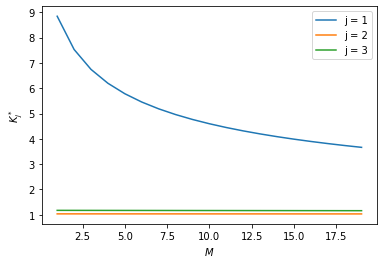

In [11]:
results_special = []
M_max = 20
for M in range(1, M_max):
    results_special.append(infinite_solution(A, 0.9, 540.0, M = M))
    
for i in range(3):
    plt.plot(range(1, M_max), [r[0][i][i] for r in results_special], label = f"j = {i+1}")
plt.legend()
plt.xlabel("$M$")
plt.ylabel("$K^*_j$")
plt.show()

Need to zoom in:

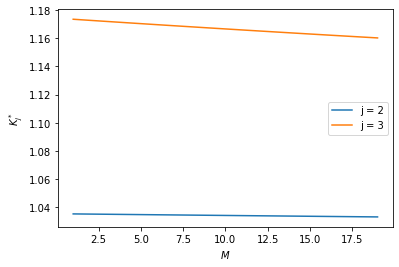

In [12]:
for i in range(1, 3):
    plt.plot(range(1, M_max), [r[0][i][i] for r in results_special], label = f"j = {i+1}")
plt.legend()
plt.xlabel("$M$")
plt.ylabel("$K^*_j$")
plt.show()

Need to zoom in again:

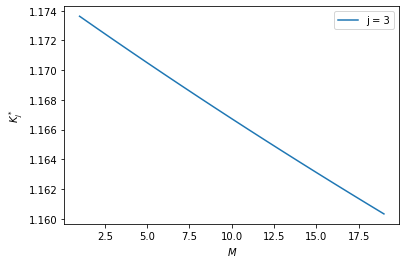

In [13]:
for i in range(2, 3):
    plt.plot(range(1, M_max), [r[0][i][i] for r in results_special], label = f"j = {i+1}")
plt.legend()
plt.xlabel("$M$")
plt.ylabel("$K^*_j$")
plt.show()

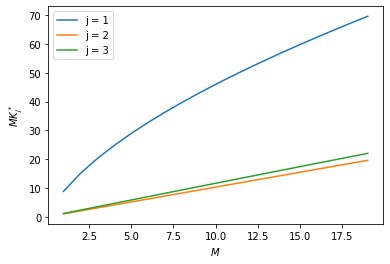

In [14]:
for i in range(3):
    plt.plot(range(1, M_max), [r[1][i][i] for r in results_special], label = f"j = {i+1}")
    
plt.legend()
plt.xlabel("$M$")
plt.ylabel("$MK^*_j$")
plt.show()

# Very special case:

Let's look only at $\lambda = 1$ and $c = 5000$. This corresponds to agent 1, so:

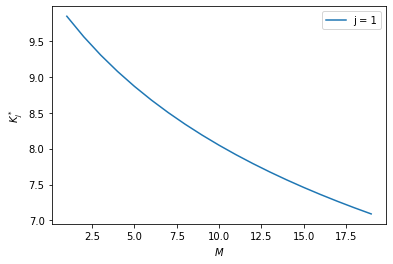

In [15]:
results_very_special = []
M_max = 20
for M in range(1, M_max):
    results_very_special.append(infinite_solution(A, 0.9, 5000.0, M = M))
    
plt.plot(range(1, M_max), [r[0][0][0] for r in results_very_special], label = f"j = {0+1}")
plt.legend()
plt.xlabel("$M$")
plt.ylabel("$K^*_j$")
plt.show()

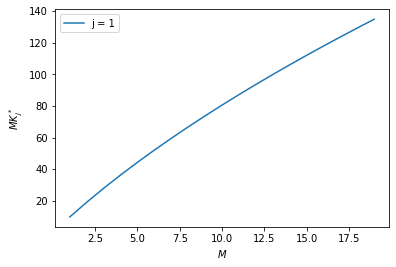

In [16]:
plt.plot(range(1, M_max), [r[1][0][0] for r in results_very_special], label = f"j = {0+1}")
    
plt.legend()
plt.xlabel("$M$")
plt.ylabel("$MK^*_j$")
plt.show()